# CP 3 Visual Receptive Fields - Luke Longren

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from scipy import signal
from math import *

%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

## 1. Visual Stimulus

### a). Approximate the visual field

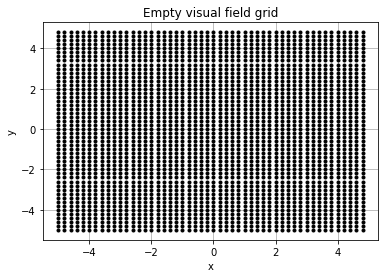

In [2]:
#2-dimensional grid of uniformly-distributed photoreceptors

x0,y0 = 5,5 # size (in degrees)
d = 25 #define how much sampling (greater d equals greater sampling)
del_x,del_y = x0/d,y0/d #sampling step size
bound_x,bound_y = int(2*x0/del_x),int(2*y0/del_y) #variable for the bounds

def grid(bound_x,bound_y):

    x,y = np.zeros(bound_x),np.zeros(bound_y) #create empty array for size of bounds
    
    for i in range(bound_x): #fill x array
    
        x[i] = -x0 + i * del_x
    
    for j in range(bound_y): #fill y array
    
        y[j] = -y0 + j * del_y
    
    xx,yy = np.meshgrid(x,y) #mesh the two arrays into a grid
    
    return xx,yy

grid = grid(bound_x,bound_y)
xx = grid[0]
yy = grid[1]

plt.plot(xx,yy, marker='.', color='k', linestyle='none')
plt.title('Empty visual field grid')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

This creates an empty grid that simulates our visual field that we are then able to fill with a stimulus along with a receptive field.

### b). Compute a sinusoidal grating on the grid

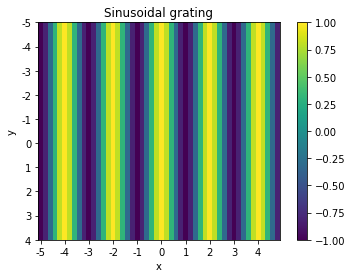

In [3]:
theta = 0 #orientation
phi = 0 #spatial phase
K = pi #spatial frequency
A = 1 #contrast amplitude

def sg_fun(x,y,theta,K): #sinusoidal grating function
    
    return(A * cos(K * x * cos(theta) + K * y * sin(theta) - phi))

def sg_plot(theta,K): #calculate the grating on the grid
    
    s = np.zeros([bound_x,bound_y]) #emptiness
    
    for i in range(bound_x):
    
        for j in range(bound_y):
           
            s[i][j] = sg_fun(xx[i][j],yy[i][j],theta,K)
    
    return s #the sinusoidal grating array

plt.imshow(sg_plot(theta=0,K=pi))
plt.title('Sinusoidal grating')
plt.xlabel('x')
plt.ylabel('y')
plt.xticks(np.arange(0, bound_x, step=5),np.arange(-5, 6, step=1))
plt.yticks(np.arange(0, bound_y, step=5),np.arange(-5, 6, step=1))
plt.colorbar()
plt.show()

This creates the sinusoidal grating visual field, which we will then be able to feed to the Gabor function in the next problem. A grating is nice for us as it has a specific frequency, of which the Gabor function will respond to.

### c). Vary the orientation theta and spatial frequency K and then plot

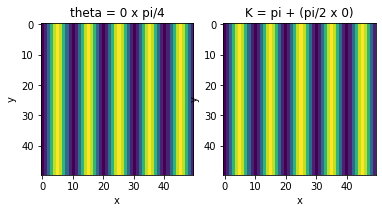

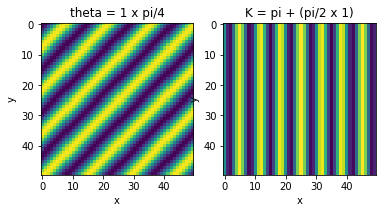

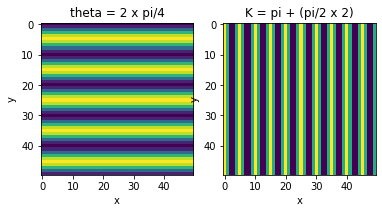

In [4]:
N = 3 #number of variations

for n in range(N):
    
    f, (ax1, ax2) = plt.subplots(1, 2)
    
    ax1.imshow(sg_plot(n*pi/4,K)) #vary the orientation  
    ax2.imshow(sg_plot(theta,(pi + (pi/2 * n)))) #vary the spatial frequency
    
    ax1.set_title('theta = %i x pi/4' %n)
    ax2.set_title('K = pi + (pi/2 x %i)' %n)
    ax1.set_xlabel('x')
    ax2.set_xlabel('x')
    ax1.set_ylabel('y')
    ax2.set_ylabel('y')

plt.show()

The previous are three different plots for varying thetas and Ks. Showing on the left that the grating rotates to the right as we increase the orientation. On the right we see a higher spatial frequency increases the number of gratings within the visual field.

## 2. A model of receptive fields

### a). Implement a Gabor function

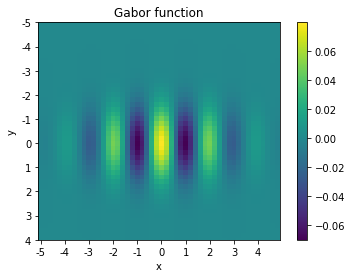

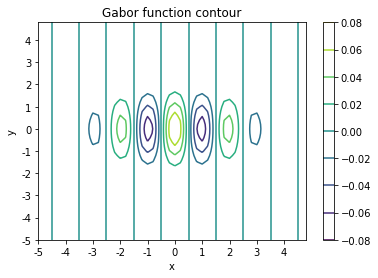

In [5]:
k = pi #preferred spatial frequency
phi = 0 #preferred spatial phase
sig_x,sig_y = 2,1 #receptive field size (in degrees)

def gab_fun(x,y,k,phi): #Gabor function
    
    a = 1/(2*pi*sig_x*sig_y)
    b = e ** ((-(x**2) / (2*sig_x**2)) - ((y**2)/(2*sig_y**2)))
    c = cos(k*x - phi)
    
    return(a*b*c) 

def gab_grid(k,phi): #calculate the Gabor function on the grid
    
    d = np.zeros([bound_x,bound_y]) #emptiness
    
    for i in range(bound_x):
    
        for j in range(bound_y):
           
            d[i][j] = gab_fun(xx[i][j],yy[i][j],k,phi)
    
    return d #the Gabor function array

plt.imshow(gab_grid(k,phi))
plt.xticks(np.arange(0, bound_x, step=5),np.arange(-5, 6, step=1))
plt.yticks(np.arange(0, bound_y, step=5),np.arange(-5, 6, step=1))
plt.title('Gabor function')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

plt.contour(gab_grid(k,phi))
plt.xticks(np.arange(0, bound_x, step=5),np.arange(-5, 6, step=1))
plt.yticks(np.arange(0, bound_y, step=5),np.arange(-5, 6, step=1))
plt.title('Gabor function contour')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

Here we see plotted the Gabor function, which is our receptive field. The second plot is a countour plot of the function.

### b). Optimal stimuli for a neuron with the RF? Where can you find a neuron with the RF? Does this RF characterize a simple cell or a complex cell?

The optimal stimuli for a neuron with a receptive field such as one modeled by the Gabor function would be a stimuli that has a frequency equal to preferred spatial frequency as well as an orientation that is preferred. A stimuli with such a frequency and orientation would lead to the maximum response of the neuron.
One can find a neuron with such a receptive field in the visual cortex of a mammalian brain.
This receptive field characterizes a simple cell.

### c). Calculate the response of a cell with a Gabor RF to the sinusoidal grating

In [6]:
def sg_resp(theta,phi,K,k): #sinusoidal grating visual field s(x, y) = A cos(Kx cos Θ + Ky sin Θ − Φ)
    
    r = np.zeros([bound_x,bound_y]) #emptiness
    
    for i in range(bound_x):
    
        for j in range(bound_y):
            
            A = sg_fun(xx[i][j],yy[i][j],theta,K) #visual field
           
            r[i][j] = (A * gab_fun(xx[i][j],yy[i][j],k,phi) * del_x * del_y)

    return np.sum(r)

print('sinusoidal grating response:',sg_resp(theta,phi,K,k))

# Compare it with a response to a uniformly illuminated visual field

def unif_resp(A,k,phi): #uniformly illuminated visual field s(x,y) = A
    
    r = np.zeros([bound_x,bound_y]) #emptiness
    
    A = 1 #visual field
    
    for i in range(bound_x):
    
        for j in range(bound_y):
           
            r[i][j] = (A * gab_fun(xx[i][j],yy[i][j],k,phi) * del_x * del_y)

    return np.sum(r)

print('uniform visual field response:',unif_resp(A,k,phi))

sinusoidal grating response: 0.4934422716402637
uniform visual field response: 0.002101221654996331


### Explain the difference:

There is a significant difference between the response of the sinusoidal grating and the uniform visual field. This difference is caused by the selectivity of the Gabor function RF. A uniform visual field has no frequency or orientation element, and thus results in a very low response. However, the sinusoidal grating has a very characteristic frequency and orientation and thus returns a much higher response.

## 3). Tuning Curve

### a). stimulus orientation theta

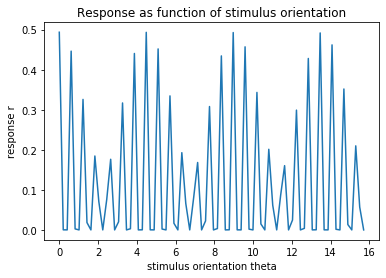

In [7]:
N = pi * 5 #how high to send the function
x = np.linspace(0,N,N*5)

res_a = np.zeros(len(x))

for i in range(len(x)): #changing stimulus orientation

    res_a[i] = sg_resp(i,phi,K,k) #here we just iterate over theta in the grating response function

plt.plot(x,res_a)
plt.title('Response as function of stimulus orientation')
plt.xlabel('stimulus orientation theta')
plt.ylabel('response r')
plt.show()

### b). ratio of the stimulus’ spatial frequency to the cell’s preferred value K/k

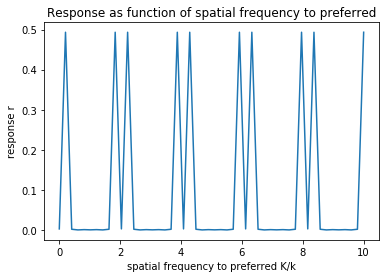

In [8]:
N = 10 #how high to send the function
x = np.linspace(0,N,N*5)

K = pi #spatial frequency
k = pi #preferred spatial frequency

res_b = np.zeros(len(x))

for i in range(len(x)): #changing spatial frequency of stimulus and preferred value

    res_b[i] = sg_resp(theta,phi,i*K,k) #here we just iterate over multiples of K

plt.plot(x,res_b)
plt.title('Response as function of spatial frequency to preferred')
plt.xlabel('spatial frequency to preferred K/k')
plt.ylabel('response r')
plt.show()

### c). stimulus spatial phase phi

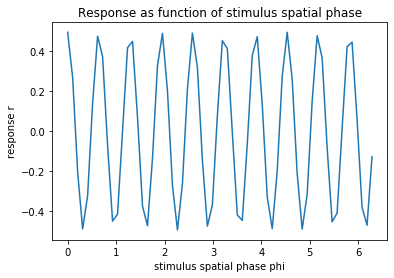

In [9]:
N = pi * 2 #how high to send the function
x = np.linspace(0,N,N*10)

res_c = np.zeros(len(x))

for i in range(len(x)): #changing spatial phase

    res_c[i] = sg_resp(theta,i,K,k) #here we just iterate over phi

plt.plot(x,res_c)
plt.title('Response as function of stimulus spatial phase')
plt.xlabel('stimulus spatial phase phi')
plt.ylabel('response r')
plt.show()

### Characterize the receptive field in terms of its selectivity and preferred stimulus:

The receptive field is selective for a stimulus orientation proportional to roughly a value of 4.

The receptive field is selective for a ratio of the stimulus’ spatial frequency to the cell’s preferred value proportional to values proportional to 2.

The receptive field is selective for spatial phase that is close to interger values.

## 4). Bonus Exercise: Image Filtering

### a). Load an arbitrary image as a visual stimulus

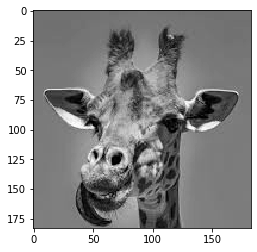

In [10]:
image1 = Image.open(r"C:\Users\lcube\Desktop\jupyter\BCCN\MNS\given\CP3\im1.png").convert("L")
image2 = Image.open(r"C:\Users\lcube\Desktop\jupyter\BCCN\MNS\given\CP3\im2.png").convert("L")
image3 = Image.open(r"C:\Users\lcube\Desktop\jupyter\BCCN\MNS\given\CP3\im3.png").convert("L")

#print(np.shape(image1))

area = (0, 0, 183, 183) #dimensions- left,upper,right,lower
crop1 = image1.crop(area) #bamm! now we have a square image

arr1 = np.asarray(crop1) 
#arr2 = np.asarray(image2)
#arr3 = np.asarray(image3)

plt.imshow(arr1, cmap='gray', vmin=0, vmax=255)
plt.show()
#plt.imshow(arr2, cmap='gray', vmin=0, vmax=255)
#plt.show()
#plt.imshow(arr3, cmap='gray', vmin=0, vmax=255)
#plt.show()

Now we have loaded the image and made it a square.

### b). Implement the response of a population of V1 cells

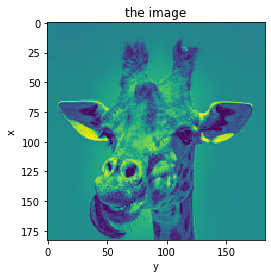

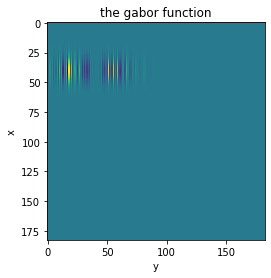

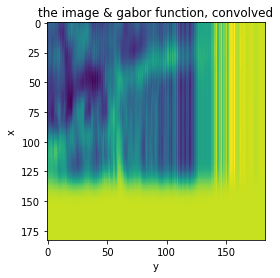

In [11]:
k = 8 * pi #preferred spatial frequency
phi = pi/2 #preferred spatial phase
del_x,del_y = 1/8,1/8 #receptive field size

image = arr1 #chosen image

x_bound = np.shape(arr1)[0]
y_bound = np.shape(arr1)[1]

d = np.zeros([x_bound,y_bound]) #emptiness
r = np.zeros([x_bound,y_bound]) #emptiness

def grid0():
    
    x,y = np.zeros([y_bound]),np.zeros([x_bound]) #create empty array for the size of the image

    for i in range(y_bound): #fill x array
    
        x[i] = -x0 + i * del_x
    
    for j in range(x_bound): #fill y array
    
        y[j] = -y0 + j * del_y
    
    xx,yy = np.meshgrid(x,y) #mesh the two arrays into a grid
    
    return xx,yy

grid0 = grid0()
xx = grid0[0]
yy = grid0[1]

#print(np.shape(image))
#print(np.shape(d))
#print(np.shape(xx))
#print(np.shape(yy))

def gab(k,phi): #calculate the Gabor function on the grid
    
    for i in range(x_bound):
    
        for j in range(y_bound):
           
            d[i][j] = gab_fun(xx[i][j],yy[i][j],k,phi)
    
    return d

gab = gab(k,phi)

#print(np.shape(gab))

im_resp = signal.fftconvolve(image, gab, mode='same') #this function convolves the image together with the Gabor fun.

plt.imshow(image)
plt.title('the image')
plt.xlabel('y')
plt.ylabel('x')
plt.show()
#plt.imshow(xx)
plt.show()
plt.imshow(yy)
#plt.show()
plt.imshow(gab)
plt.title('the gabor function')
plt.xlabel('y')
plt.ylabel('x')
plt.show()
plt.imshow(im_resp)
plt.title('the image & gabor function, convolved')
plt.xlabel('y')
plt.ylabel('x')
plt.show()

Shown above are images of the input image, cropped to a square, the gabor function, and the convolution of the two of them together.